# Age prediction
by Abhishek Chatterjee(abhishekchatterjeejit@gmail.com)

http://imdeepmind.ml

In [0]:
# The dataset is in my google drive
# So this code is for downloading those dataset here in collab

# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
# Importing pandas and numpy for data manapulation

import pandas as pd
import numpy as np

In [0]:
data = pd.read_csv('drive/My Drive/datasets/wiki_0.csv')

In [18]:
# Lets explore the dataset

data.head()

,Unnamed: 0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel4091,pixel4092,pixel4093,pixel4094,pixel4095,pixel4096,dob,photo_taken,gender,name
0,0,64,65,70,50,177,122,92,78,90,...,37,39,39,45,48,43,1981-05-05,2009,male,Sami Jauhojärvi
1,1,143,155,157,165,162,175,166,165,169,...,95,66,58,61,69,54,1925-04-04,1964,male,Dettmar Cramer
2,2,38,54,54,46,51,34,37,25,35,...,115,115,115,115,115,115,1948-07-03,2008,male,Marc Okrand
3,3,47,47,47,47,47,47,47,47,45,...,144,142,142,147,153,156,1971-05-31,2012,female,Diana Damrau
4,4,197,210,218,215,220,206,190,165,143,...,64,48,53,62,69,56,1960-11-09,2012,female,Krista Tippett


In [4]:
print(data.shape)
print(data.columns)

(36156, 4101)
Index(['Unnamed: 0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel4091', 'pixel4092', 'pixel4093', 'pixel4094', 'pixel4095',
       'pixel4096', 'dob', 'photo_taken', 'gender', 'name'],
      dtype='object', length=4101)


In [0]:
# Manapulating the data

data = data.drop(['Unnamed: 0', 'gender', 'name'], axis=1)
X = data.drop(['dob', 'photo_taken'], axis=1)
y1 = data['dob']
y2 = data['photo_taken']

# del data

X = X.values.reshape(-1,64,64,1)

X = X / 255.0

In [0]:
y1 = y1.values
y2 = y2.values

In [0]:
import datetime as date
from dateutil.relativedelta import relativedelta

y = []

for i in range(len(y1)):
  try:
    d1 = date.datetime.strptime(y1[i][0:10], '%Y-%m-%d')
  except:
    d1 = date.datetime.strptime('1963-01-01', '%Y-%m-%d')
  d2 = date.datetime.strptime(str(y2[i]), '%Y')
  rdelta = relativedelta(d2, d1)
  y.append(rdelta.years)

In [0]:
y = np.asarray(y, np.int64)
y = y/100

In [0]:
# Spliting the dataset into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=2)

del X, y

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout
from keras.preprocessing.image import ImageDataGenerator

model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = 3, strides=1, padding='same', activation = 'relu', input_shape = (64,64,1)))
model.add(Conv2D(filters = 16, kernel_size = 3, strides=1, padding='same', activation = 'relu'))
model.add(Conv2D(filters = 16, kernel_size = 3, strides=1, padding='same', activation = 'relu'))

model.add(MaxPool2D(pool_size = 2, strides = 2))

model.add(Flatten())
model.add(Dense(units = 128, activation = 'relu'))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(0.33))
model.add(Dense(units = 1, kernel_initializer='normal'))

datagen = ImageDataGenerator(
        featurewise_center=False,
        samplewise_center=False,  
        featurewise_std_normalization=False,
        samplewise_std_normalization=False,
        zca_whitening=False,
        rotation_range=10,  
        zoom_range = 0.1, 
        width_shift_range=0.1,  
        height_shift_range=0.1,
        horizontal_flip=False,  
        vertical_flip=False)

datagen.fit(X_train)

model.compile(loss='mean_squared_error', optimizer='adam')

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [42]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 64, 64, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 16)        2320      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 16)        2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16384)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               2097280   
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
__________

In [44]:
# Training the model

history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                    validation_data = (X_test,y_test),
                    steps_per_epoch=len(X_train) / 32, epochs=25)

Epoch 1/25
1017/1016 [==============================] - 26s 25ms/step - loss: 0.0200 - val_loss: 0.0174
Epoch 2/25
1017/1016 [==============================] - 26s 25ms/step - loss: 0.0196 - val_loss: 0.0173
Epoch 3/25
1017/1016 [==============================] - 26s 26ms/step - loss: 0.0191 - val_loss: 0.0168
Epoch 4/25
1017/1016 [==============================] - 26s 25ms/step - loss: 0.0192 - val_loss: 0.0160
Epoch 5/25
1017/1016 [==============================] - 25s 25ms/step - loss: 0.0188 - val_loss: 0.0170
Epoch 6/25
1017/1016 [==============================] - 26s 25ms/step - loss: 0.0186 - val_loss: 0.0190
Epoch 7/25
1017/1016 [==============================] - 25s 25ms/step - loss: 0.0185 - val_loss: 0.0153
Epoch 8/25
1017/1016 [==============================] - 25s 25ms/step - loss: 0.0181 - val_loss: 0.0164
Epoch 9/25
1017/1016 [==============================] - 25s 25ms/step - loss: 0.0180 - val_loss: 0.0156
Epoch 10/25
1017/1016 [==============================] - 25s 25m

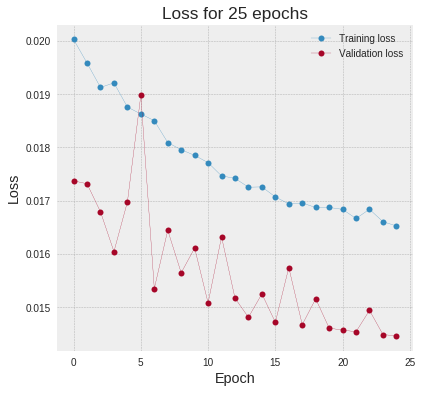

In [46]:
import matplotlib.pyplot as plt
hist_df = pd.DataFrame(history.history)

fig = plt.figure(figsize=(14,6))
plt.style.use('bmh')
params_dict = dict(linestyle='solid', linewidth=0.25, marker='o', markersize=6)

plt.subplot(121)
plt.plot(hist_df.loss, label='Training loss', **params_dict)
plt.plot(hist_df.val_loss, label='Validation loss', **params_dict)
plt.title('Loss for ' + str(len(history.epoch)) + ' epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

In [0]:
model.save('age.h5')